# Problem 7b, HW 8

(This is a component of solving 7b.) 

**Task**: Given a network consisting of $n$ nodes, count how many "triangles" (i.e., cliques of size $k = 3$) have:
- $0$ nodes in common
- $1$ nodes in common
- $2$ nodes in common
- $3$ nodes in common

## Observations

We know, by the covariance matrix for indicators $I_{1}, ..., I_{\binom{n}{3}}$, that (in total) there are $\binom{n}{3}^{2}$ pairwise permutations of indicators.

By symmetry, we could just work with the combinations: 

$$
\underbrace{\binom{n}{3}}_{\text{variance terms}} + \underbrace{\frac{\binom{n}{3}^{2} - \binom{n}{3}}{2}}_{\text{coveriance terms}}
$$

(Later we will simply transform the `count_matrix` (by symmetry) to see the pairwise permutation of node triplets.)

Here, we get a matrix of the same size as the covariance matrix, but rather than covariances as entries, each element in the `count_matrix` is the count of overlapping nodes for the pair of node triplets being compared. (Each node triplet has a one-to-one correspondence with each of the indicator random variables from above.)

In [1]:
# Import dependencies
from collections import Counter
from itertools import combinations, combinations_with_replacement
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Helper functions

def node_triplets(n: int) -> list:
    """
    Returns ordered list of all 'triangles' (i.e., combination of nodes) 
    in network size n.
    
    Observe that this returns set of size n choose 3, where each
    element corresponds to the indicator that the 3 node indices 
    in a given element are a clique.
    """
    return list(combinations(range(n), 3))

def indicator_pairs(node_triplets: set) -> list:
    """
    Return the ordered pairwise combinations (with replacement) 
    of potential triangles.
    """
    return list(combinations_with_replacement(node_triplets, 2))

def np_node_overlap_counter(indicator_pair: np.array, axis: int = 0) -> int:
    """
    Returns the number of overlapping nodes between two triplets
    where the triplets are passed in as (2, 3) array
    """
    assert(indicator_pair.ndim == 2)
    return np.intersect1d(indicator_pair[0], indicator_pair[1]).size

def count_matrix(n: int) -> np.array:
    """
    Returns 2D numpy array of pairwise combinations of node triplets,
    each triplet corresponding to its indicator random variable.
    
    The values in the cells are the counts of overlapping nodes for
    each combination of indicator.
    """
    # Load pairwise combinatons of node triplets in lexical order
    indicator_combs = np.array(sorted([*indicator_pairs(node_triplets(n))]))

    # Calculate the node overlaps over pairs in lexical order
    node_overlap_counts = [np_node_overlap_counter(pair) for pair in indicator_combs]

    # Arrange into matrix of same dimensions as covariance matrix; perfect
    # overlaps (3 overlap nodes) should be along diagonal
    count_matrix = np.zeros((num_indicators, num_indicators))
    indices = np.triu_indices(num_indicators)
    count_matrix[indices] = node_overlap_counts
    return count_matrix

## Visualizing Node Overlaps

Below, I try to visualize the pattern of counts of pairwise triplet combinations (where each triplet combination is a potential "triangle" in the network).

Remember, the pairing of triplets comes from the fact that this corresponds to pairing of indicator random variables in the covariance matrix, where each indicator indicated whether a particular triplet is indeed a "triangle" in the network of size $n$. 

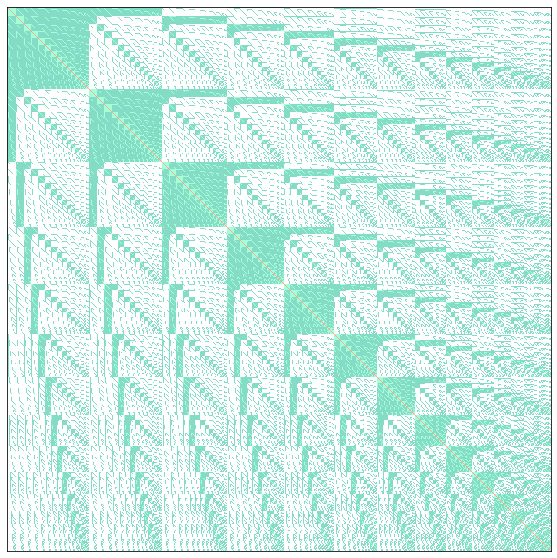

In [3]:
# Set network size
n = 20
num_indicators = math.comb(n, 3)
X_comb = count_matrix(n)

# Counts of pairwise permutations of node triplets
X_perm = X_comb + X_comb.T - np.diag(np.diag(X_comb))
counts_perm = sorted(Counter(X_perm.flatten().astype(int)).items(), 
                     key=lambda kv_pair: kv_pair[0])

# Custom colormap for each case (# of node overlaps)
rgb = np.array([[255, 255, 255], 
                [132, 220, 198], 
                [165, 255, 214], 
                [255, 166, 158]])

cm = ListedColormap(rgb/255)

# Plot count matrix
plt.figure(figsize=(20,10))
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False)
plt.imshow(X_perm, interpolation='nearest', cmap=cm)
plt.show()

In [4]:
# Show numerical answer
for k, v in counts_perm:
    print(f"{v} pairwise permutations of node triplets with {k} nodes in common")

775200 pairwise permutations of node triplets with 0 nodes in common
465120 pairwise permutations of node triplets with 1 nodes in common
58140 pairwise permutations of node triplets with 2 nodes in common
1140 pairwise permutations of node triplets with 3 nodes in common


## Analytical Counting

Via casework, we can arrive at the analytical solution:

1. For any given triplet pair, for $t$ nodes in common, we will need $\binom{n}{6-t}$ nodes to choose from.
2. We then need to choose $t$ of the selected nodes from (1) to be the one(s) shared between the triplet pair: $\binom{6-t}{t}$.
3. Finally, we can arrange the _non_-matching nodes $((6-t)-t)!$ ways; we divide by $(3-t)!^{2}$ to account for duplicate arrangements between the two triplets.

Hence, we have **an expression that counts the number of pairwise permutations in a network of size $n$ of two node triplets that have $t$ nodes in common**:

$$
\binom{n}{6-t} \binom{6-t}{t} \frac{((6-t)-t)!}{(3-t)!^{2}}
$$

In [5]:
# Show analytical answer
for t in range(4):
    x = math.comb(n, 6-t) * math.comb(6-t, t) * math.factorial((6-t)-t) / (math.factorial(3-t) ** 2)
    print(f"{int(x)} pairwise permutations of node triplets with {t} nodes in common")

775200 pairwise permutations of node triplets with 0 nodes in common
465120 pairwise permutations of node triplets with 1 nodes in common
58140 pairwise permutations of node triplets with 2 nodes in common
1140 pairwise permutations of node triplets with 3 nodes in common
